In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
Datos= pd.read_csv('./heart_cleveland_upload.csv')

In [10]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [11]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos presion arterial')

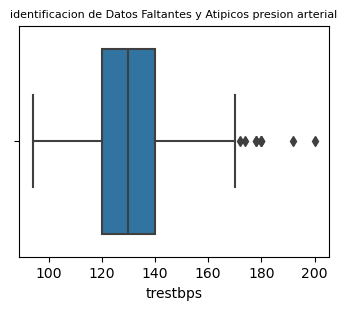

In [18]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('identificacion de Datos Faltantes y Atipicos presion arterial', fontsize=8)

In [20]:
print ("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['age'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0


In [22]:
print ("Cantidad de Registros con cero en Nivel de edad: ",Datos['age'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de sexo: ",Datos['sex'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de codigo postal: ",Datos['cp'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Presion sanguinea: ",Datos['trestbps'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de colesterol: ",Datos['chol'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['fbs'].isin([0]).sum())
print ("Cantidad de Registros con cero en Resultados electrocardiográficos en reposo: ",Datos['restecg'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Ritmo cardíaco máximo alcanzado: ",Datos['thalach'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Angina inducida por el ejercicio ",Datos['exang'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de inducido por el ejercicio relativo: ",Datos['oldpeak'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de La pendiente del segmento ST: ",Datos['slope'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de El numero de venas que se puede ver en una fluoroscopia: ",Datos['ca'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Anemia llamada talasemia: ",Datos['thal'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel Si el paciente tiene una enfermedad o no: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de edad:  0
Cantidad de Registros con cero en Nivel de sexo:  96
Cantidad de Registros con cero en Nivel de codigo postal:  23
Cantidad de Registros con cero en Nivel de Presion sanguinea:  0
Cantidad de Registros con cero en Nivel de colesterol:  0
Cantidad de Registros con cero en Nivel de Glucosa:  254
Cantidad de Registros con cero en Resultados electrocardiográficos en reposo:  147
Cantidad de Registros con cero en Nivel de Ritmo cardíaco máximo alcanzado:  0
Cantidad de Registros con cero en Nivel de Angina inducida por el ejercicio  200
Cantidad de Registros con cero en Nivel de inducido por el ejercicio relativo:  96
Cantidad de Registros con cero en Nivel de La pendiente del segmento ST  139
Cantidad de Registros con cero en Nivel de El numero de venas que se puede ver en una fluoroscopia  174
Cantidad de Registros con cero en Nivel de Anemia llamada talasemia  164
Cantidad de Registros con cero en Nivel Si el paciente tiene una enfermed

In [23]:
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())

In [24]:
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [25]:
print ("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['fbs'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel Resultados electrocardiográficos en reposo: ",Datos['restecg'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de Angina inducida por el ejercicio: ",Datos['exang'].isin([0]).sum())
print ("Cantidad de Registros con cero en Nivel de inducido por el ejercicio relativo: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Nivel Resultados electrocardiográficos en reposo:  0
Cantidad de Registros con cero en Nivel de Angina inducida por el ejercicio:  0
Cantidad de Registros con cero en Nivel de inducido por el ejercicio relativo:  0


Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos Glucosa')

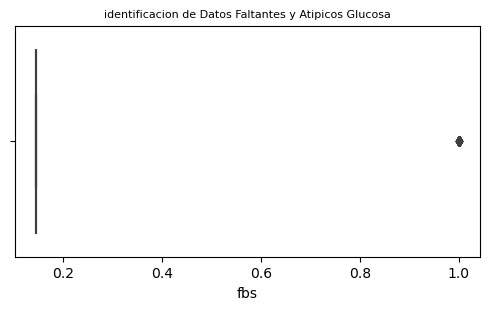

In [26]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['fbs'])
plt.title('identificacion de Datos Faltantes y Atipicos Glucosa', fontsize=8)

Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos Resultados electrocardiográficos en reposo')

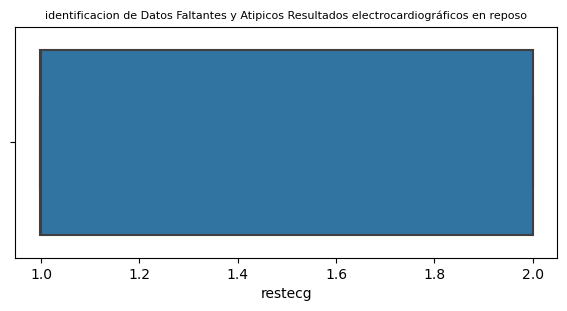

In [27]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=Datos['restecg'])
plt.title('identificacion de Datos Faltantes y Atipicos Resultados electrocardiográficos en reposo', fontsize=8)

Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos Angina inducida por el ejercicio')

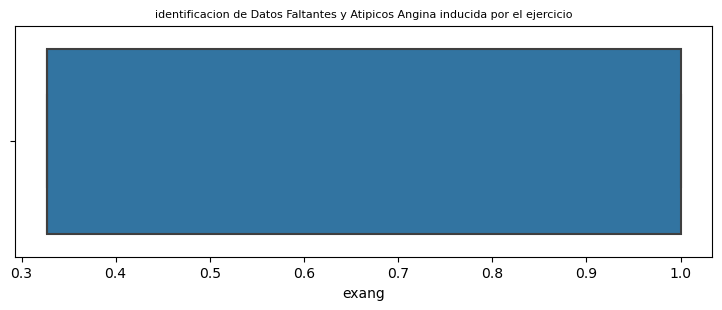

In [28]:
plt.figure(figsize=(9, 3))
sns.boxplot(x=Datos['exang'])
plt.title('identificacion de Datos Faltantes y Atipicos Angina inducida por el ejercicio', fontsize=8)

Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos inducido por el ejercicio relativo')

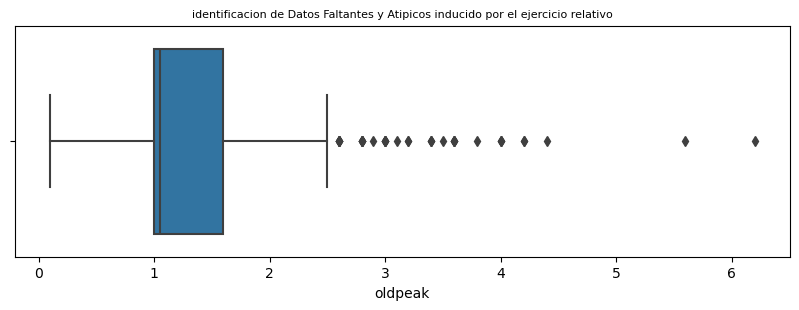

In [29]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('identificacion de Datos Faltantes y Atipicos inducido por el ejercicio relativo', fontsize=8)

In [31]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 32.6 KB


In [32]:
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [33]:
Datos[['condition']].head(50)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [34]:
x=Datos.drop('condition',axis=1)
y=Datos['condition']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,stratify=y, random_state=0)

In [35]:
print (x_train)

     age  sex  cp  trestbps  chol       fbs   restecg  thalach     exang  \
234   56    0   3       200   288  1.000000  2.000000      133  1.000000   
82    66    0   2       146   278  0.144781  2.000000      152  0.326599   
36    56    1   1       120   240  0.144781  0.996633      169  0.326599   
237   56    1   3       132   184  0.144781  2.000000      105  1.000000   
133   47    1   2       108   243  0.144781  0.996633      152  0.326599   
..   ...  ...  ..       ...   ...       ...       ...      ...       ...   
291   40    1   3       110   167  0.144781  2.000000      114  1.000000   
195   61    0   3       130   330  0.144781  2.000000      169  0.326599   
170   65    0   3       150   225  0.144781  2.000000      114  0.326599   
135   46    0   2       142   177  0.144781  2.000000      160  1.000000   
293   39    1   3       118   219  0.144781  0.996633      140  0.326599   

      oldpeak  slope  ca  thal  
234  4.000000      2   2     2  
82   1.055556      1 

In [36]:
print (y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [38]:
modelo_regresion= LogisticRegression(solver="liblinear")
modelo_regresion.fit (x_train , y_train)

Prediccion =modelo_regresion.predict(x_test)

In [39]:
print (y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [41]:
print (Prediccion)

[1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1]


In [43]:
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



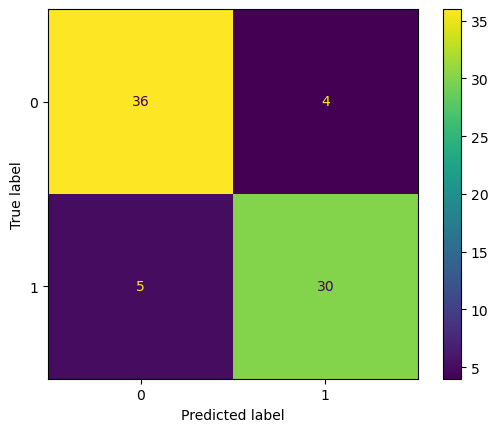

In [45]:
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

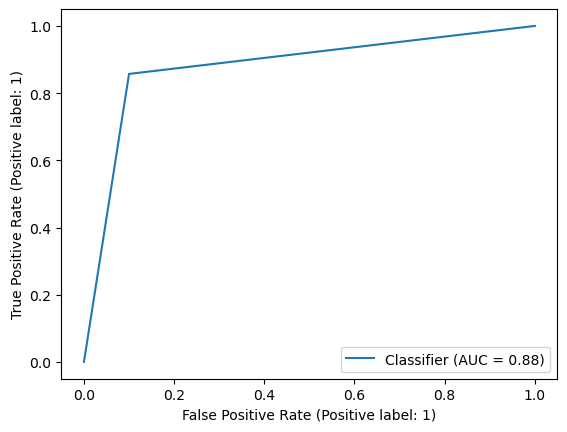

In [47]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,Prediccion)
plt.show()